In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from IPython.display import display
import warnings
from helper import create_df_sc, wrap_labels
from helper import millions_formatter, thousands_formatter


In [2]:
# %matplotlib inline
# plt.style.use('fivethirtyeight')
# Set style
sns.set_theme(context='notebook',style='darkgrid')
# Suppress all warnings
warnings.filterwarnings("ignore")

[24-10-0055-01](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2410005501): Non-resident visitors entering Canada, by country of residence, mode of transportation, arrival type and traveller type

In [134]:
# read the table
pid = "2410005501"
start_date = "20160101"
selected_members = "[[1],[1,2,7],[1],[1],[1,2,3]]"
period = 'M'
df = create_df_sc(pid,start_date,selected_members,period)

https://www150.statcan.gc.ca/t1/tbl1/en/dtl!downloadDbLoadingData-nonTraduit.action?pid=2410005501&latestN=&startDate=20160101&endDate=&csvLocale=en&selectedMembers=%5B%5B1%5D%2C%5B1%2C2%2C7%5D%2C%5B1%5D%2C%5B1%5D%2C%5B1%2C2%2C3%5D%5D 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 963 entries, 2016-01-01 to 2024-11-01
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   GEO                     963 non-null    object
 1   Country of residence    963 non-null    object
 2   Mode of transportation  963 non-null    object
 3   Arrival type            963 non-null    object
 4   Traveller type          963 non-null    object
 5   VALUE                   963 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 52.7+ KB
None 

               GEO Country of residence       Mode of transportation  \
REF_DATE                                                               
2024-07-01  Canada    

In [135]:
# Rename columns and index
df=df.rename(columns={'GEO': 'Destination','VALUE': 'Travel'})
df=df.rename_axis('Date')
df=df.drop(columns=['Destination','Mode of transportation','Arrival type'])
df['Country of residence'].replace({'Non-resident visitors entering Canada':'All countries',
    'United States of America residents entering Canada':'United States'},inplace=True)

In [40]:
df.sample(10)

,Country of residence,Traveller type,Travel
Date,,,
2019-09-01,All countries,Excursionists (same-day),942949
2022-07-01,United States,Tourists (overnight),1483493
2023-08-01,All countries,Excursionists (same-day),1174374
2019-03-01,United States,Tourists (overnight),797206
2024-09-01,United States,Visitors,2198468
2022-05-01,All countries,Visitors,1428129
2024-08-01,Mexico,Tourists (overnight),39775
2019-10-01,All countries,Tourists (overnight),1641134
2018-06-01,United States,Excursionists (same-day),1070007


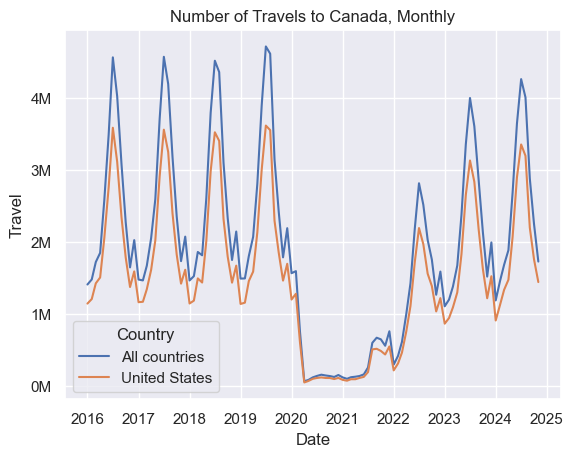

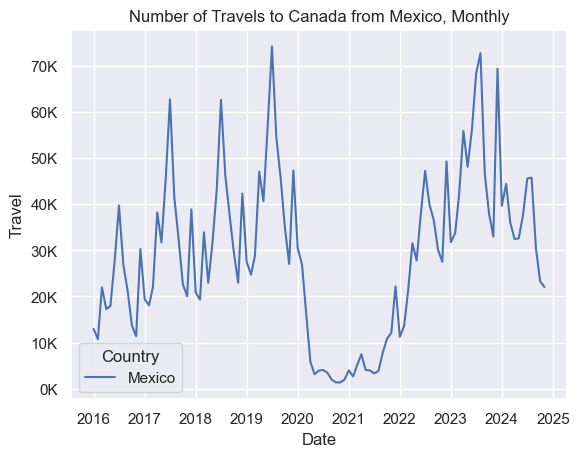

In [136]:
cond1 = (df['Country of residence'] == 'All countries') | \
    (df['Country of residence'] == 'United States')
cond2 = df['Traveller type'] == 'Visitors'
df1 = df[cond1 & cond2]
ax1 = sns.lineplot(data=df1, x='Date', y='Travel',hue='Country of residence')
ax1.set(title='Number of Travels to Canada, Monthly')
ax1.legend(loc='lower left',title='Country')
ax1.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.show()


cond1 = df['Country of residence'] == 'Mexico'
cond2 = df['Traveller type'] == 'Visitors'
df1 = df[cond1 & cond2]
ax2 = sns.lineplot(data=df1, x='Date', y='Travel',hue='Country of residence')
ax2.set(title='Number of Travels to Canada from Mexico, Monthly')
ax2.legend(loc='lower left',title='Country')
ax2.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))


,Travel,Percentage
Month,,
1,"689,065",4.4%
2,"768,732",4.9%
3,"830,361",5.3%
4,"906,675",5.8%
5,"1,271,413",8.1%
6,"1,872,570",12.0%
7,"2,343,370",15.0%
8,"2,189,106",14.0%
9,"1,603,259",10.2%


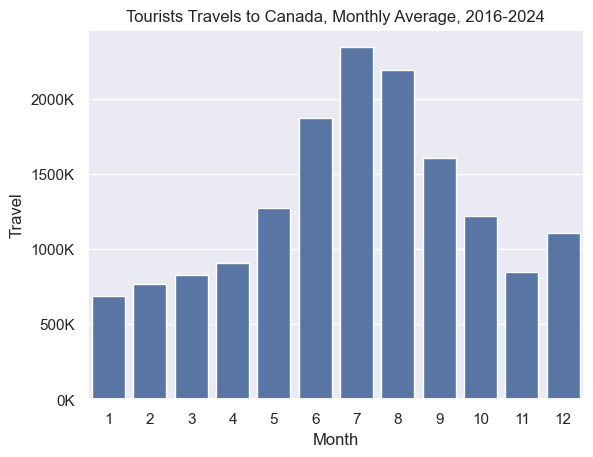

In [140]:
cond1 = df['Country of residence'] == 'All countries'    
cond2 = df['Traveller type'] == 'Tourists (overnight)'
df1 = df[cond1 & cond2]
df1['Month'] = df1.index.month
df2 = pd.DataFrame(df1.groupby('Month')['Travel'].mean())


#total and percentage
total = df2.Travel.sum()
df2['Percentage'] = df2['Travel']/total

#styling
styler = df2.style.format({
    'Travel': '{:,.0f}',       # Thousands separator with no decimal places
    'Percentage': '{:.1%}'     # Format as percentage with 2 decimal places
})

display(styler)

# bar chart
ax = sns.barplot(data=df2,x='Month',y='Travel')
ax.set( title='Tourists Travels to Canada, Monthly Average, 2016-2024')
ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))





,Travel,Percentage
Traveller type,,
Visitors,"27,680,567",100.0%
Tourists (overnight),"18,411,822",66.5%
Excursionists (same-day),"9,268,745",33.5%


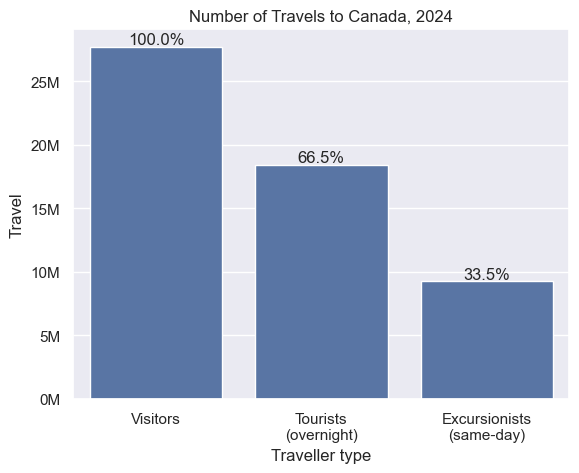

In [141]:
cond1 = df['Country of residence'] == 'All countries'
cond2 = df.index.year == 2024    
df1 = df[cond1 & cond2]

df2 = pd.DataFrame(df1.groupby('Traveller type')['Travel'].sum().
        sort_values(ascending=False))

#total and percentage
total = df2.iloc[0]['Travel']
df2['Percentage'] = df2['Travel']/total

#styling
styler = df2.style.format({
    'Travel': '{:,.0f}',       # Thousands separator with no decimal places
    'Percentage': '{:.1%}'     # Format as percentage with 2 decimal places
})

display(styler)

# bar chart
ax = sns.barplot(data=df2,x='Traveller type',y='Travel')
ax.set( title='Number of Travels to Canada, 2024')
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
wrap_labels(ax, 10)
# Add Data labels
for i, p in enumerate(ax.patches):
    percentage = df2['Percentage'][i]
    ax.annotate(f'{percentage:.1%}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points',
                bbox=dict(facecolor='white', alpha=0)) 

In [142]:
# read the table
pid = "2410005501"
start_date = "20240101"
dim2 = list(range(1,283))
selected_members = f"[[1],{dim2},[1],[1],[1,2,3]]"
period = 'M'
df = create_df_sc(pid,start_date,selected_members,period)

https://www150.statcan.gc.ca/t1/tbl1/en/dtl!downloadDbLoadingData-nonTraduit.action?pid=2410005501&latestN=&startDate=20240101&endDate=&csvLocale=en&selectedMembers=%5B%5B1%5D%2C%5B1%2C%202%2C%203%2C%204%2C%205%2C%206%2C%207%2C%208%2C%209%2C%2010%2C%2011%2C%2012%2C%2013%2C%2014%2C%2015%2C%2016%2C%2017%2C%2018%2C%2019%2C%2020%2C%2021%2C%2022%2C%2023%2C%2024%2C%2025%2C%2026%2C%2027%2C%2028%2C%2029%2C%2030%2C%2031%2C%2032%2C%2033%2C%2034%2C%2035%2C%2036%2C%2037%2C%2038%2C%2039%2C%2040%2C%2041%2C%2042%2C%2043%2C%2044%2C%2045%2C%2046%2C%2047%2C%2048%2C%2049%2C%2050%2C%2051%2C%2052%2C%2053%2C%2054%2C%2055%2C%2056%2C%2057%2C%2058%2C%2059%2C%2060%2C%2061%2C%2062%2C%2063%2C%2064%2C%2065%2C%2066%2C%2067%2C%2068%2C%2069%2C%2070%2C%2071%2C%2072%2C%2073%2C%2074%2C%2075%2C%2076%2C%2077%2C%2078%2C%2079%2C%2080%2C%2081%2C%2082%2C%2083%2C%2084%2C%2085%2C%2086%2C%2087%2C%2088%2C%2089%2C%2090%2C%2091%2C%2092%2C%2093%2C%2094%2C%2095%2C%2096%2C%2097%2C%2098%2C%2099%2C%20100%2C%20101%2C%20102%2C%20103%2C%20

In [143]:
# Rename columns and index
df=df.rename(columns={'GEO': 'Destination','VALUE': 'Travel'})
df=df.rename_axis('Date')
df=df.drop(columns=['Destination','Mode of transportation','Arrival type'])
df['Country of residence'].replace({'Non-resident visitors entering Canada':'All countries',
    'United States of America residents entering Canada':'United States',
    'Residents of countries other than the United States of America entering Canada':
        'Other than United States'},inplace=True)

In [ ]:
cond1 = df['Traveller type'] == 'Tourists (overnight)'
cond2 = df.index.year == 2024
cond3 = ~((df['Country of residence'] == 'Other than United States') | \
        (df['Country of residence'] == 'Europe') | \
        (df['Country of residence'] == 'Asia') | \
        (df['Country of residence'] == 'Western Europe') | \
        (df['Country of residence'] == 'Americas, countries other than the United States of America') | \
        (df['Country of residence'] == 'Northern Europe') |\
        (df['Country of residence'] == 'Northeast Asia') | \
        (df['Country of residence'] == 'Southern Asia') | \
        (df['Country of residence'] == 'North America, countries other than the United States of America') | \
        (df['Country of residence'] == 'South America') | \
        (df['Country of residence'] == 'Southern Europe') | \
        (df['Country of residence'] == 'Southeast Asia') | \
        (df['Country of residence'] == 'Africa') | \
        (df['Country of residence'] == 'Caribbean') | \
        (df['Country of residence'] == 'Central/Eastern Europe') | \
        (df['Country of residence'] == 'Middle East'))          


df1 = df[cond1 & cond2 & cond3]
df2 = pd.DataFrame(df1.groupby('Country of residence')['Travel'].sum().nlargest(11).
        sort_values(ascending=False))
#total and percentage
total = df2.iloc[0]['Travel']
df2['Percentage'] = df2['Travel']/total

#styling
styler = df2.style.format({
    'Travel': '{:,.0f}',       # Thousands separator with no decimal places
    'Percentage': '{:.1%}'     # Format as percentage with 2 decimal places
})

print('Tourists Travels to Canada, 2024:\n')
display(styler)

Tourists Travels to Canada, 2024:



,Travel,Percentage
Country of residence,,
All countries,"18,411,822",100.0%
United States,"13,010,704",70.7%
United Kingdom,"696,189",3.8%
France,"573,874",3.1%
India,"388,769",2.1%
Mexico,"355,409",1.9%
Germany,"298,405",1.6%
Oceania,"289,375",1.6%
Australasia,"283,623",1.5%
